In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import string
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
# Loading the dataset
spam_clas = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
# Displaying the first 10 rows of the dataset
spam_clas.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
# Checking the shape (number of rows and columns) of the dataset
spam_clas.shape

(5572, 5)

In [5]:
spam_clas.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [6]:
spam_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
spam_clas.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam_clas.rename(columns={"v1":"target","v2":"SMS_Text"},inplace = True)
spam_clas.sample()

,target,SMS_Text
404,ham,"Yep, the great loxahatchee xmas tree burning o..."


In [9]:
spam_clas.rename(columns={"v1":"target","v2":"SMS_Text"},inplace = True)
spam_clas.sample(5)

,target,SMS_Text
355,ham,Thank You for calling.Forgot to say Happy Onam...
621,ham,Good words.... But words may leave u in dismay...
3569,spam,Customer Loyalty Offer:The NEW Nokia6650 Mobil...
5252,ham,You do your studies alone without anyones help...
4250,ham,Omg Joanna is freaking me out. She's looked th...


In [10]:
label_encode = LabelEncoder()

In [11]:
spam_clas['target'] = label_encode.fit_transform(spam_clas['target'])
spam_clas.head()

,target,SMS_Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam_clas.isnull().sum()

target      0
SMS_Text    0
dtype: int64

In [13]:
spam_clas.duplicated().sum()

403

In [14]:
spam_clas = spam_clas.drop_duplicates(keep ="first")

In [15]:
spam_clas.duplicated().sum()

0

In [16]:
spam_clas.shape

(5169, 2)

In [17]:
spam_clas.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
spam_clas["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

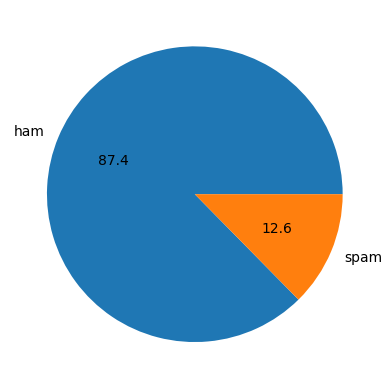

In [19]:
plt.pie(spam_clas["target"].value_counts(), labels = ['ham','spam'],autopct="%0.1f")
plt.show()

In [20]:
spam_clas["num of characters"] = spam_clas["SMS_Text"].apply(len)
spam_clas.head()

,target,SMS_Text,num of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
spam_clas["num of words"] = spam_clas["SMS_Text"].apply(lambda x : len(nltk.word_tokenize(x)))
spam_clas.head()

,target,SMS_Text,num of characters,num of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
spam_clas["num of sentences"] = spam_clas["SMS_Text"].apply(lambda x : len(nltk.sent_tokenize(x)))
spam_clas.head()

,target,SMS_Text,num of characters,num of words,num of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
spam_clas[["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
spam_clas[spam_clas['target']==0][["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Text(0, 0.5, 'num of Characters')

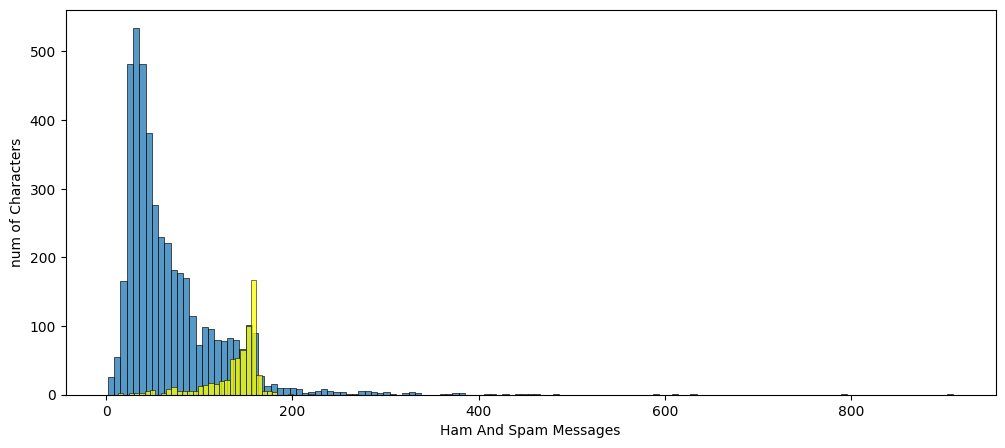

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(spam_clas[spam_clas["target"]==0]["num of characters"])
sns.histplot(spam_clas[spam_clas["target"]==1]["num of characters"],color = "yellow")
plt.xlabel('Ham And Spam Messages')
plt.ylabel('num of Characters')

C:\Users\juvvi\AppData\Local\Temp\ipykernel_8596\3924176445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_clas.corr(),annot=True)


<Axes: >

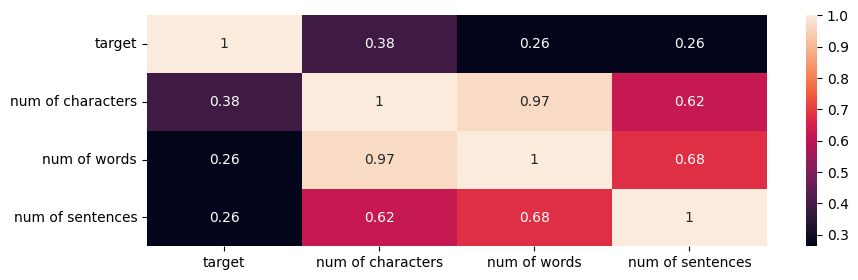

In [26]:
plt.figure(figsize=(10,3))
sns.heatmap(spam_clas.corr(),annot=True)

In [27]:
ps = PorterStemmer()

In [28]:
def transform_text(Input_text):
  #lower case
  Input_text.lower()

  #tokenization
  Input_text = nltk.word_tokenize(Input_text)

  #special character
  temp = []
  for i in Input_text:
    if i.isalnum():
      temp.append(i)
  Input_text = temp[:]
  temp.clear()
  #stop words
  for i in Input_text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      temp.append(i)
  Input_text = temp[:]
  temp.clear()
  # Stemming
  for i in Input_text:
    temp.append(ps.stem(i))
  Input_text = temp[:]

  return " ".join(Input_text)

In [29]:
spam_clas["transformed"] = spam_clas["SMS_Text"].apply(transform_text)

In [30]:
spam_clas.head()

,target,SMS_Text,num of characters,num of words,num of sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")


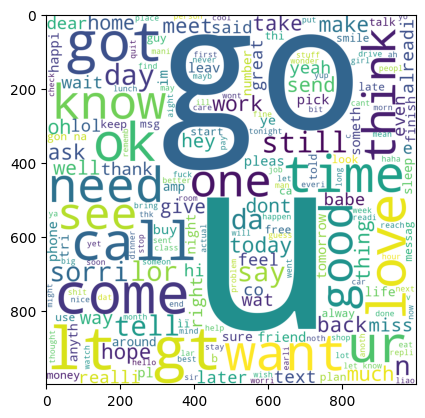

In [32]:
ham_wc = wc.generate(spam_clas[spam_clas["target"]==0]["transformed"].str.cat(sep=" "))
plt.imshow(ham_wc)

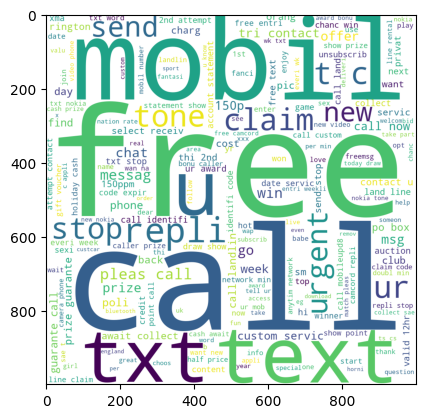

In [33]:
spam_wc = wc.generate(spam_clas[spam_clas["target"]==1]["transformed"].str.cat(sep=" "))
plt.imshow(spam_wc)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features = 3000)

In [35]:
X_data = tf_idf.fit_transform(spam_clas["transformed"]).toarray()
X_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X_data.shape

(5169, 3000)

In [37]:
y_data = spam_clas["target"].values
y_data

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
y_data.shape

(5169,)

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,y_data,test_size = 0.2, random_state=2)

In [40]:
print(X_train.shape)
X_test.shape

(4135, 3000)


(1034, 3000)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [42]:
# Model 1: Gaussian Navie bayes
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(X_train,Y_train)
gnb_predictions =gnb_model.predict(X_test)

In [43]:
# Model 1: Multinomial Navies Bayes
mnb_model = MultinomialNB()
mnb_model = mnb_model.fit(X_train,Y_train)
mnb_predictions = mnb_model.predict(X_test)

In [44]:
# Model 1: Bernoulli Navies Bayes
bnb_model = BernoulliNB()
bnb_model = bnb_model.fit(X_train,Y_train)
bnb_predictions = bnb_model.predict(X_test)

In [45]:
# Model 2: Logistic Regression
logistic_model = LogisticRegression(solver = 'liblinear',penalty = 'l1')
logistic_model = logistic_model.fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(X_test)

In [46]:
# Model 3:Support Vector Machine
svm_model = SVC(kernel = 'sigmoid',gamma=1)
svm_model = svm_model.fit(X_train,Y_train)
svm_predictions = svm_model.predict(X_test)

In [47]:
name = {
    "GNB": gnb_model,
    "MNB": mnb_model,
    "BNB": bnb_model,
    "LR": logistic_model,
    "SVM":svm_model ,  
}

In [48]:
#Evaluation
def evaluate_model(name, predictions):
    print(f"------- {name} -------")
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))
    print("Classification Report:\n", classification_report(Y_test, predictions))

In [49]:
# Displaying predictions of Gaussian Navies Bayes model
print(gnb_predictions)

[0 1 1 ... 0 0 0]


In [50]:
# Displaying predictions of Multinomial Navies Bayes model
print(mnb_predictions)

[0 0 0 ... 0 0 0]


In [51]:
# Displaying predictions of Bernoulli Navies Bayes model
print(bnb_predictions)

[0 0 0 ... 0 0 0]


In [52]:
# Displaying predictions of logistic regression model
print(logistic_predictions)

[0 0 0 ... 0 0 0]


In [53]:
# Displaying predictions of Support Vector Machine model
print(svm_predictions)

[0 0 0 ... 0 0 0]


In [54]:
# Evaluating Gaussian Navies Bayes model
evaluate_model("Gaussian Navies Bayes:",gnb_predictions)

------- Gaussian Navies Bayes: -------
Accuracy: 0.874274661508704
Confusion Matrix:
 [[795 101]
 [ 29 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       896
           1       0.52      0.79      0.63       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [55]:
# Evaluating Multinomial Navies Bayes model
evaluate_model("Multinomial Navies Bayes:",mnb_predictions)

------- Multinomial Navies Bayes: -------
Accuracy: 0.9748549323017408
Confusion Matrix:
 [[896   0]
 [ 26 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



In [56]:
# Evaluating Bernoulli Navies Bayes model
evaluate_model("Bernoulli Navies Bayes:",bnb_predictions)

------- Bernoulli Navies Bayes: -------
Accuracy: 0.9845261121856866
Confusion Matrix:
 [[895   1]
 [ 15 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.89      0.94       138

    accuracy                           0.98      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.98      0.98      0.98      1034



In [57]:
# Evaluating logistic Regression model
evaluate_model("Logistic Regression", logistic_predictions)

------- Logistic Regression -------
Accuracy: 0.9555125725338491
Confusion Matrix:
 [[892   4]
 [ 42  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.97       896
           1       0.96      0.70      0.81       138

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [58]:
# Evaluating Support Vector Machine model
evaluate_model("Support Vector Machine:",svm_predictions)

------- Support Vector Machine: -------
Accuracy: 0.9787234042553191
Confusion Matrix:
 [[895   1]
 [ 21 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.85      0.91       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

